# **Modern Statistics : A Computer-Based Approach with Python (CHAPTER-1)**

*These are notes and code snippets I made(Optmze/ayush.devmail@gmail.com) while going through the above book. They serve as a source of self-revision and future revision*

# **CHAPTER-1: DESCRIPTIVE STATISTICS**


**0.Importing necessary modules**
---



In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

**1.Loading data and fetching the first few rows:**
---



In [2]:
df = pd.read_csv("steel.csv")
print(df.head(n=3)) #By default it's n=5

   STEELROD
0   19.3327
1   18.4519
2   20.2554


**2.Simulating and Generation random numbers (for example here coin toss)**
---



In [3]:
# EXAMPLE FROM THE BOOK
from scipy.stats import binom
X = binom.rvs(1,0.5,size=50) #n=50,p=0.5
print(X)

[1 0 1 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 0
 0 0 1 0 0 0 1 1 0 1 1 1 0]


**3.Plotting, creating a scatter plot**
---



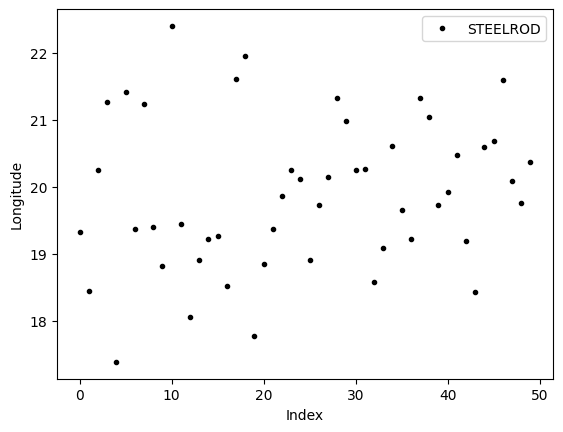

In [4]:
# EXAMPLE FROM THE BOOK
ax = df.plot(y='STEELROD',style='.',color='black')
ax.set_xlabel('Index')
ax.set_ylabel('Longitude')
plt.show()

This is produced by a process that is supposed to give 20cm rods, however there are fluctuations as can be seen. The process can malfunction and cause a shift in the avg value.

Here: Xi is <br>
{ <br>
  O + Ei, i = 1,2,..25<br>
  N + Ei, i = 26,...50<br>
}<br>
O = 20, is original level of the process<br>
N = 17 is the new level after shift<br>
Ei = random component<br>

Two components: fixed(O,N) and random(Ei)<br>
Deterministic = fixed+non-random<br>

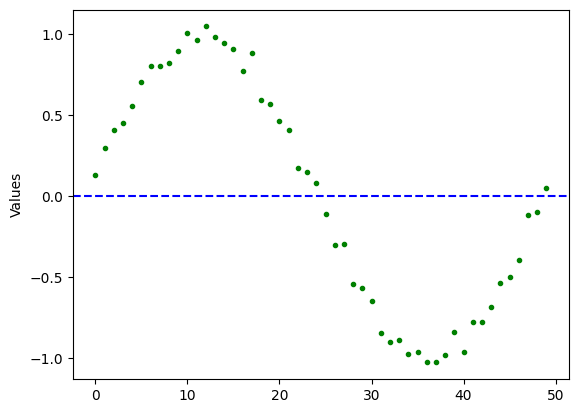

In [5]:
# EXAMPLE FROM THE BOOK
import math
from scipy.stats import norm
# basically values of x = 1 to x = 50
x = [math.sin(x*2*math.pi / 50) for x in range(1,51)]
# a random normal
x = [xi + norm.rvs(loc=0,scale=0.05) for xi in x] # mean=0,sd=0.05
ax = pd.Series(x).plot(style='.',color='green') # note here x is a series not a dataframe
ax.set_ylabel('Values')
ax.axhline(y=0,linestyle='--',color='blue') # put line y = 0
plt.show()

**4. Accuracy and Precision of Measurements**
---



**Accurate** = if repetitive measurements gives an average equal to true value
(inaccurate otherwise)

**Precision** = dispersion of measurement around average; small dispersion = high precision
(also called Repeatability)

**Reproducibility** = impact of measurement procedure on the measurement uncertainty



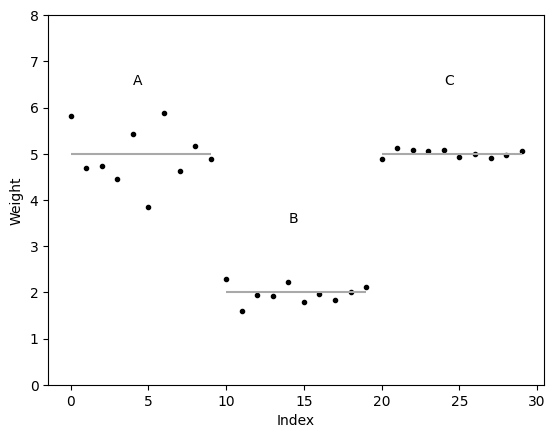

In [6]:
# EXAMPLE FROM THE BOOK
np.random.seed(seed=1)
x = np.concatenate([5 + norm.rvs(loc=0, scale=0.5, size=10),
2 + norm.rvs(loc=0, scale=0.2, size=10),
5 + norm.rvs(loc=0, scale=0.1, size=10)])
ax = pd.Series(x).plot(style='.', color='black')

#set values
ax.set_ylabel('Values')
ax.set_xlabel('Index')
ax.set_ylabel('Weight')

#hlines to make the lines, xmin and xmax help us to limit the line segment
ax.hlines(y=5, xmin=0, xmax=9, color='darkgray')
ax.hlines(y=2, xmin=10, xmax=19, color='darkgray')
ax.hlines(y=5, xmin=20, xmax=29, color='darkgray')

#we can add texts/labels at the specified coordinates
ax.text(4, 6.5, 'A')
ax.text(14, 3.5, 'B')
ax.text(24, 6.5, 'C')

#setting limit of y, we can do the same for ax.set_xlim
ax.set_ylim(0, 8)
plt.show()

In the above we can see:<br>
**Instrument-A:** A is accurate(avg=5), but too much dispersion <br>
**Instrument-B:** B is inaccurate(avg=2) but more precise than A <br>
**Instrument-C:** As accurate as A but more precise than A<br>

So basically:<br>
**Accuracy:** A = C > B <br>
**Precise:**  B ~ C > A


**5.Population and Sample**
---



**Statistical population** = collection of units with a common attribute <br>

**Sample** = subset of given population; usually taken from a population and used to observe it's characteristics.

Example: Acceptance sampling (making acceptances and rejections based on a random sample)

**6. Descriptive Analysis of Sample Values**
---



Frequency distribution of sample is a way to describe a distribution; two types:

**discrete** : only assume a finite number of different values

**continuous** : assuming all values in a given interval like an output voltage


(A)<ins>**Frequency distribution of DRV:**<br>
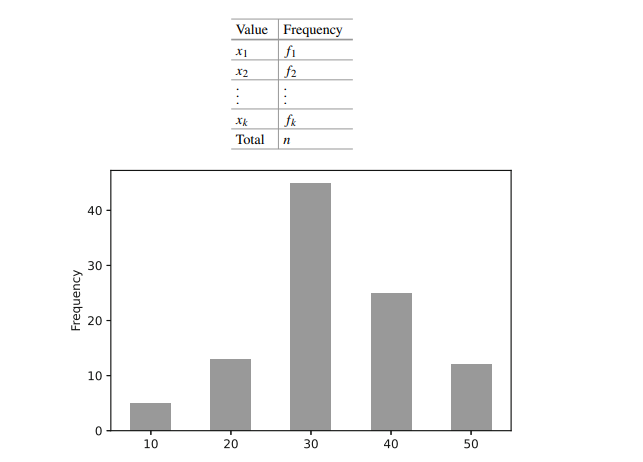<br>

The above is a bar diagram

We can calculate relative frequencies pi: <br>
**pi = fi / n**

Another representation is using the cumulative frequency(Fi) of xi = sum of frequencies of values less than or equal to xi. Usually looks like a step function<br>

The proportional frequencies: **Pi = Fi / n** <br>
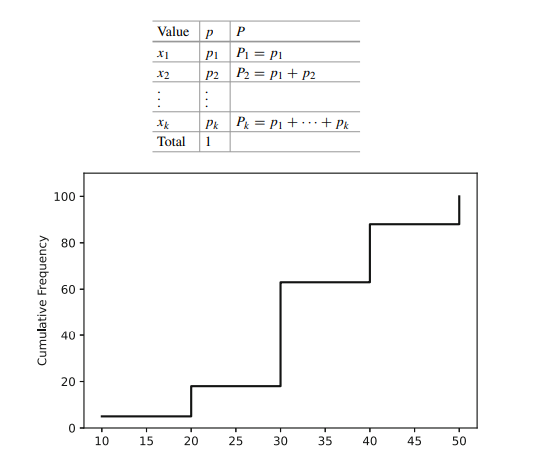


In [7]:
# BASICS
data = pd.read_csv("cchart.csv") #loading a dataframe
print(data.head(3))
print(data.iloc[1,0]) # accessing individual element in row i and column j; iloc[i,j]
print(data['c'].head(2)) # we can extract a whole column too

    c
0  12
1   8
2   6
8
0    12
1     8
Name: c, dtype: int64


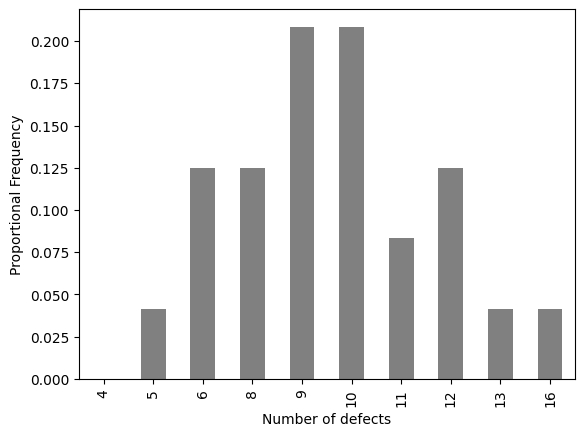

In [8]:
# value_counts(normalize=False,sort=True,ascending=False,bins=None,dropna=True) returns series with number of unique values;
# normalize + value counts gives relative frequencies

X = pd.DataFrame(data['c'].value_counts(normalize=True))
X.loc[4, 'c'] = 0 # adding a row, since in our data set we don't have anything below a 5
X = X.sort_index() # sort the indexes

ax = X['c'].plot.bar(color='grey', legend=False)
ax.set_xlabel('Number of defects')
ax.set_ylabel('Proportional Frequency')
plt.show()


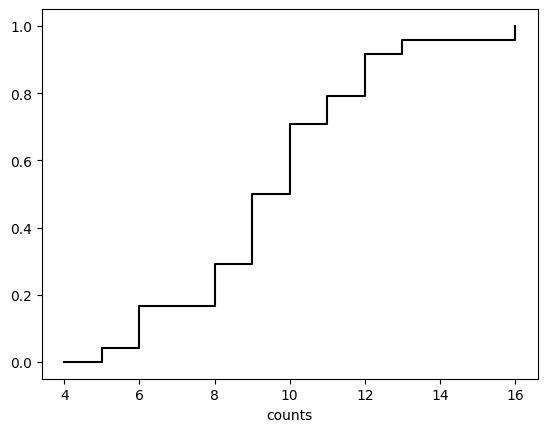

In [9]:
# adding a column
X['counts'] = X.index
X['cmf'] = X['c'].cumsum()

ax1 = X.plot.line(x="counts",y="cmf",color='black',drawstyle='steps-post',legend=False)
ax.set_xlabel("No of defects")
ax.set_ylabel("CMF")
ax.set_ylim(0,1.1) # set y limits
plt.show()

(B) <ins>**Frequency Distributions of CRV**:</ins><br>
Subintervals are also called bins,classes or class intervals. We consider two things:<br>
```
(i) How many subintervals?
(ii) Width of interval (Narrowness)
```
Hard to answer usually recommended to use between 10 and 15 subintervals in large samples of equal width.

NOTE:

---
You want two things: more data records and
narrower intervals , but for narrower intervals if   your   sample size is too small then way too little in between them and some may have the incorrect estimate of 0.0 probability. Interval size depends on the sample size, larger sample size means more narrower intervals

**How many intervals should we pick?** <br>
```
Ugly rule of thumb:  If n is your sample size, pick n^½ intervals
```

**How large is large enough?** <br>
```
Ugly rule of thumb: if sample size n>=30 then histogram is an adequate estimate of p(y)
(Larger n = Better accuracy)
```

Always remember model produces the data and not the other way around. Statistical inference helps us reduce the uncertainty in parameters

**A model is considered to be good if:**<br>
```
(i) Model set of  all possible outcomes matches nature's set of possible outcomes
             
Eg: For a coin, the outcomes = {H,T} so our bernoulli's distribution is good as it has two possible outcomes too

(ii) Frequency of occurrence and successive combo of outcomes matches that with nature
  (0,0,1,0,1,1)
```
Eg of a bad model is say: if odd = heads, else even = tails. This means randomly generating the data would produce ..H,T,H,T.. But this does not include the possibility of something like ..H H .Hence the domains don’t match!

YOU DON’T NEED TO KNOW A MODEL’S PARAMETERS VALUE TO KNOW IT’S A GOOD MODEL

**What do we do with a model?** <br>
```
Well we run simulations to produce DATA*, we can use to this compare optimal trading strategies, coin tosses,predicting election results etc.
```

---


A frequency distribution table might look like this:<br>
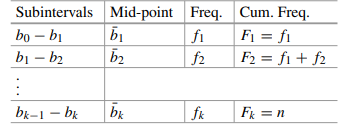

For example if you have 100 values where smallest value is Y = 5.7978 and largest to be 5.7978; You can calculate the range as:<br>
range = 5.7978 - 1.1514 = 4.6464 <br>
Since we want approx 15 subinterval we: 4.6464 / 15c = 0.31; we need the width to be about this; however it might be more convenient to go with 0.50

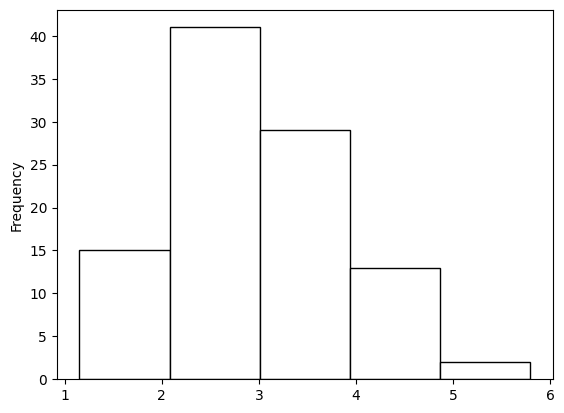

In [10]:
yarn = pd.read_csv("yarn.csv")
ax = yarn.plot.hist(bins=5,color="white",edgecolor = 'black',legend=False)
# bins is the number of these towers we want
ax.set_label('Log yarn strength')
plt.show()

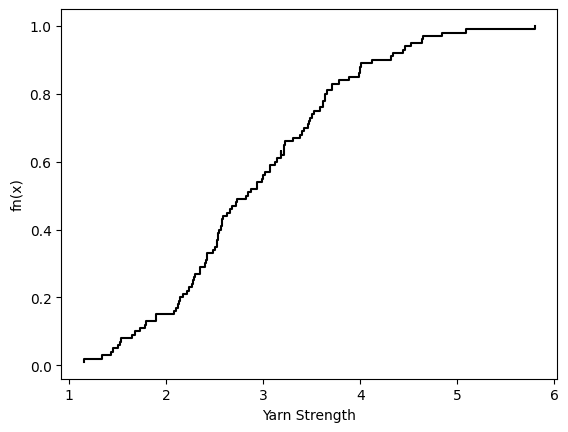

In [11]:
cmf = pd.DataFrame({'Yarn Strength': yarn['YARNSTRG'].sort_values(),"fn(x)": range(1,len(yarn) + 1)})
cmf['fn(x)'] = cmf['fn(x)'] / len(yarn)
cmf.sort_values('Yarn Strength',inplace=True)
ax = cmf.plot(x='Yarn Strength',y='fn(x)',color='black',drawstyle='steps-post',legend=False)
ax.set_ylabel('fn(x)')
plt.show()

# now df['column] gives us a Series we can use .sort_values()
# but for a df.sort_values(by='column',inplace=True); you need the b parameter

<ins>**(C) Statistics of Ordered Sample**</ins><br>
**order statistics** = characteristics values sorted from smallest to largest.

[2385,2400,2285,2765,2410,2360,2750,2200,2500,2550] = [X_1,X_2 ... X_n] here n = 10

You first sort the sample, then:

1) **X_i** = ith order statistic<br>

2) **X_i.5** = (Xi + X(i+1)) / 2  = mean <br>

3) **X_1** =  sample minimum  <br>

4) **X_n** =  sample maximum   <br>

5) **X_n - X1** =  sample range  <br>

6) **M_e = Xm** where m = (n+1)/2 middle value in ordered sample or  median ; if n = 10 then:

m = (10 + 1) / 2 = 5.5 so:<br>
M_e = X_5.5 = (X5 + X6) / 2

A median tells us the about the center of dispersion of sample values

7) **Q1 = X_q1 , Q3 = X_q3** =  sample quartiles  where: <br>
q1 = (n+1)/4 <br>
q3 = 3(n+1)/4 <br>
Where Q1 = lower quartile and Q3 = upper quartile. They divide the sample such that:<br>

(i) 1/4th values is smaller than Q1<br>
(ii) 1/2 are between Q1 and Q3 <br>
(iii) 1/4 are greater than Q3 <br>

For example: q1 = 11/4 for n = 10 -> 2.75 <br>
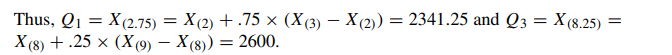

Similarly we did for X_5.5, another way to find the value is:
image.png

Some definitions:<br>
- Sample median, quartiles -> **sample
  quantiles**<br>

- **pth sample quantile** -> number that exceeds exactly 100p% of sample values
For example: median is the 0.5 sample quantile



In [12]:
 # the p-th sample quantile
yarn.quantile(q=[0,0.25,0.5,0.75,1.0])

# mean
print("Mean:{0}".format(yarn.mean()))

# several statistics in a concise format
print(yarn.describe())

Mean:YARNSTRG    2.923843
dtype: float64
         YARNSTRG
count  100.000000
mean     2.923843
std      0.937759
min      1.151400
25%      2.284450
50%      2.833050
75%      3.542550
max      5.797800


(D) <ins>**Statistics of Location and Dispersion**</ins>

**Sample Mean:**<br> 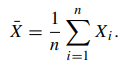 <br>
 The mean, like the median is a measure of central tendency. To measure the spread of the data about the mean we use **sample variance**: <br>

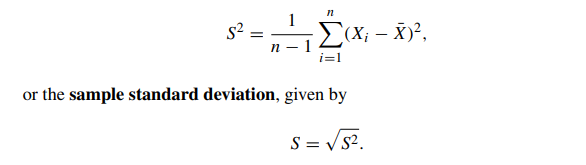

S.D is usally used more as the units are those of which the original measurement was made in. Together with the mean it provides us information on the variability and central tendency of observation.

<ins>**Shape of distribution**</ins><br>
Sample skewness and kurtosis tells us about the shape of the observation:<br>
**SKEWNESS:**<br>
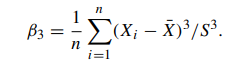 <br>
**KURTOSIS:** <br>
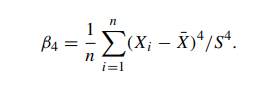 <br>



In [13]:
# Pandas
print("Skewness:{0}".format(yarn.skew()))
print("Kurtosis:{0}".format(yarn.kurtosis()))
# with scipy you can use scipy.stats; skew(yarn) and kurtosis(yarn)

Skewness:YARNSTRG    0.416426
dtype: float64
Kurtosis:YARNSTRG   -0.007958
dtype: float64


<ins>**SKEWNESS**</ins><br>
-  **skewness = 0**, *distribution is symmetric around its mean* (X' = Me)

- **skewness > 0**, *distribution is positively skewed* (X' > Me)

- **skewness < 0**,* distribution is negatively skewed* (X' < Me)

<ins>**KURTOSIS**</ins><br>
- **kurtosis = 3**; *normal distribution *(Mesokurtic)

- **kurtosis > 3**; *steep* (Leptokurtic)

- **kurtosis < 3**; *flat* (Platykurtic)

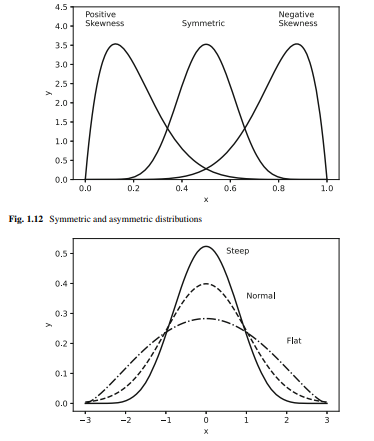

**Geoemetric Mean:**<br>
Defined only for positive value variables. Used as a central tendency measure for rates of change and index numbers (eg: desirability function)

Note: G <= X' ; = if all values are same in sample<br>
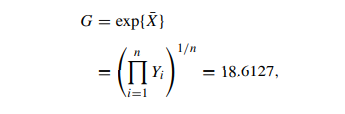


Other Important definitions:

(i) <ins>**Interquartile Range:**</ins> IQR = Q3 - Q1 <br>
Useful where extreme values or outliers in the sample; it can yield an estimate of S

(ii) <ins>**Coeff. of variation:**</ins> y = S/|X'| <br>
Useful to compare variability of different datasets when std deviation grows with mean.

**7.Prediction Intervals**
---


We can use sample statistics on the sample of observation from some population to predict how future measurements will behave.<br>

Prediction accuracy depends on sample size; valid for any type of distribution.

For ordered measurements we partition the real line into n+1 subintervals:<br>
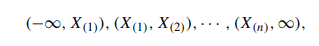<br>
We can predict that:<br>
(I)**100/(n+1)% of all future observations will fall in any one of the sub intervals**.<br>
(II)**100*i/(n+1)% of future samples are less than i-th order statistic (Xi)**<br>
(III) **One out of every n+1 future measurement is expected to be greater than Xn**<br>

Note: X1 is not the smallest possible, we expect one out of every n+1 future measurement to be less than Xn

Predicting future measurements using sample skewness/kurtosis is difficult as it depends on type of distribution that follow. IF: <br>
 - skewness = approx 0 <br>
 - kurtosis = approx 3 (normal)<br>

Then:<br>
(i) Approx 68% lies within 1 SD of mean <br>
(ii) Approx 95% lies within 2 SD of mean <br>
(iii) Approx 99.7% lies within 3 SD of mean <br>

For example if X' = 2.92 and S = 0.94 so:<br>
68% of measurements will lie between X'-S = 1.98 and X'+S = 3.86 and so on.

IF DATA DOES NOT FOLLOW NORMAL DISTRIBUTION WE USE "**CHEBYSHEV'S INEQUALITY**":
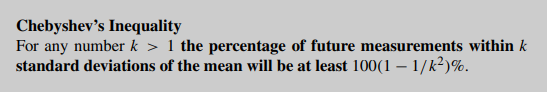 <br>
This means that at least 75% of all measurements will fall within 2 SDs, though these are true for any distribution; however real percentages can be much more as it only gives a lower bound.

Also note: the prediction statements are only accurate to the degree that the sample is representative of the entire population. With small sample sizes we can't be very confident as they might not be enough to even recognize the type of distribution.

**Prediction intervals which are correct with high confidence are called tolerance intervals**

**8.Other techniques of exploratory data analysis**
---


<ins>Other tools:</ins> **Density plot**, **box and whiskers plot**, **quantile plot**, **stem-and-leaf diagram**

<ins> **(A) DENSITY PLOT**</ins>

<Axes: ylabel='Density'>

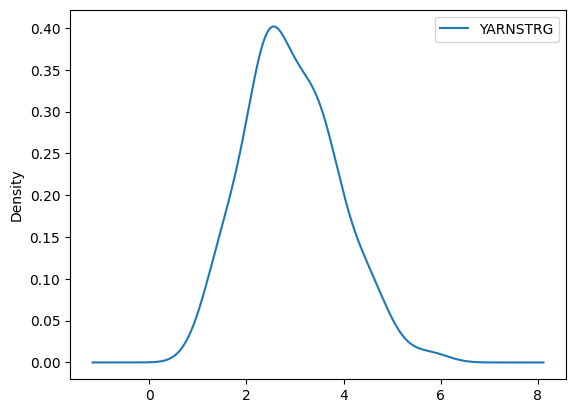

In [14]:
yarn.plot.density()

Also called kernel density plots, the kernel density f(x) is calculated from n data points:
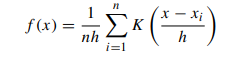

Here K is the kernel and h>0 is the smoothing parameter. Variety of K exists but usually we use the normal distribution one

The smoothing parameter/bandwidth controls the level of detal. Too small shows lots of details but under smooth while too big hides important detail. One rule of thumb is to use Scott's Rule, but this is not good for multi-modal data (data with more than 1 peak): <br>

d=1; no of dimensions
S' = estimate of the sd
n = no of data points

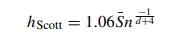

For multimodal data, better to use plugin methods like Sheather-Jones or cross validation methods to give better density estimates. Also note that if data changes abruptly then single bandwidth is not suitable, adaptive bandwidth density estimates can be used.

In [15]:
!pip install KDEpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.0/139.0 kB 3.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for KDEpy: filename=KDEpy-1.1.7-cp310-cp310-linux_x86_64.whl size=491729 sha256=8d1a0246d386ff6b616cd2f2bbe07fc099755add249fff7e70d6a5de376d74e5
  Stored in directory: /root/.cache/pip/wheels/1b/8d/03/81d3c0ff10af0a000dd06f2306713fe22b741b1aaf040acb54
Successfully built KDEpy


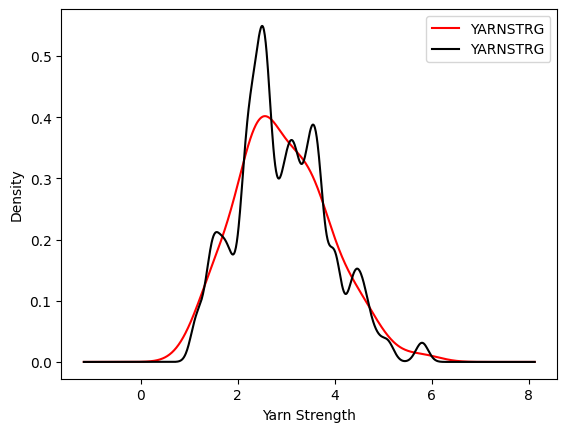

In [16]:
from KDEpy.bw_selection import improved_sheather_jones
h = improved_sheather_jones(yarn.values.reshape(-1,1))
ax = yarn.plot.density(color='red') # normal plot
yarn.plot.density(bw_method=h,color='black',ax=ax) # sj
ax.set_xlabel('Yarn Strength')
ax.set_ylabel("Density")
plt.show()


Reference to KDEpy:
https://kdepy.readthedocs.io/en/latest/bandwidth.html

<ins> **(B) BOX AND WHISKERS PLOT**</ins>

Provides an efficient display of various features, like location,dispersion and skewness.

The box consists of:
- Lower hinge = First Quartile Q1 = X_q1
- Upper hinge = Third Quartile Q3 = X_q3
- Inside the box, the line drawn is the median, while the cross is the sample mean.
- The length of the box represents the interquartile range(Q3-Q1); a measure of dispersion
- Two whiskers: <br>
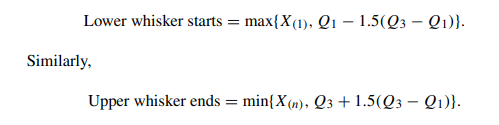 <br>
Data beyond them are called outliers

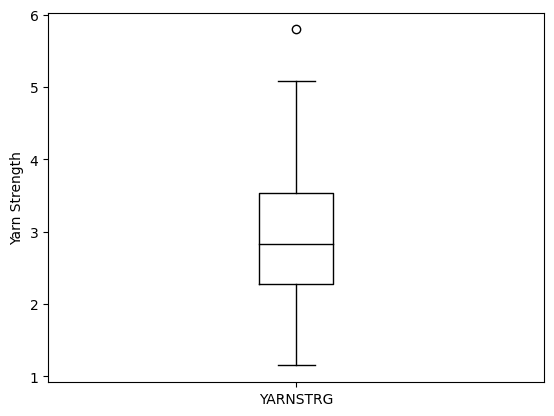

In [17]:
ax = yarn.plot.box(color='black')
ax.set_ylabel("Yarn Strength")
plt.show()

We see one point outside, which is an outlier. Perhaps a measuring error

<ins>**(C) Quantile Plots**</ins> <br>
It is a plot of the sample quantiles xp against p, where 0 < p < 1 where:<br>
image.png<br>
It helps us obtain a graphical estimate of the quantiles in the distribution. If the data values falls along a roughly straight line at 45 degree angle, then data is normally distributed <br>

General QQ plot
A method to compare two probability distributions by plotting their quantiles, a point (x,y) is ; quantile of one distribution plotted against the same quantile of the other<br>

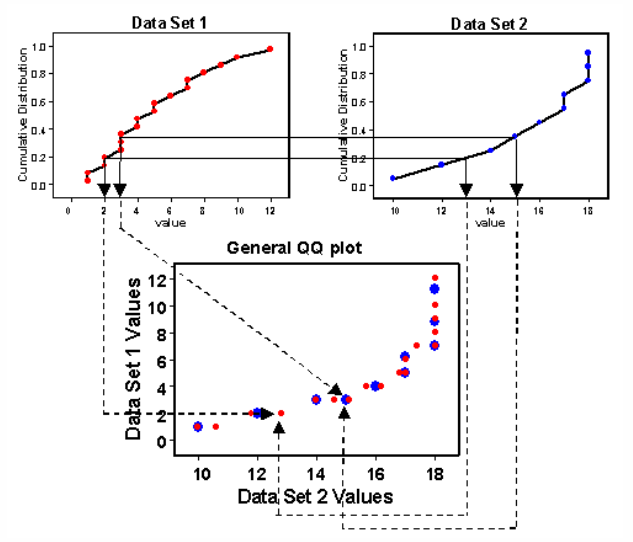<br>

The Normal QQ plot is thus basically:<br>

Data values are ordered and cumulative distribution values are calculated as (i-0.5)/n for the ith ordered value out of n total values (basically proportion of data below a certain value) <br>

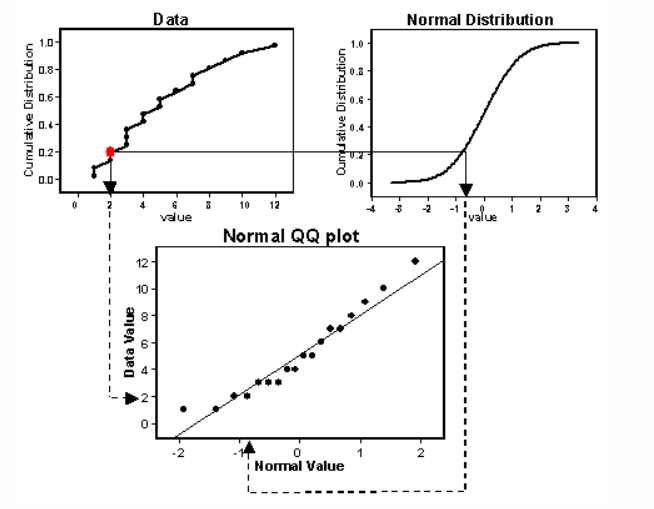<br>
Basically here we have the cumulative distribution, data set as a standard normal distribution with mean = 0 and sd = 1


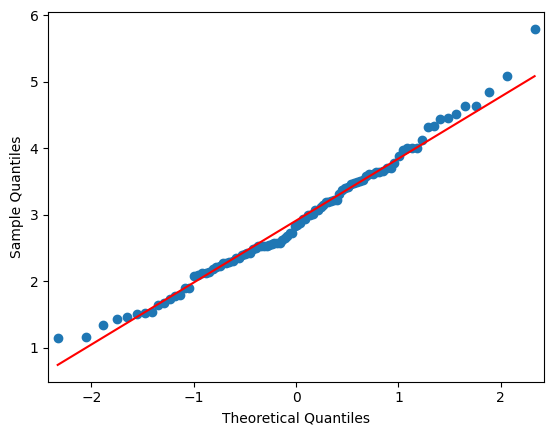

In [32]:
import statsmodels.api as sm
import pylab as py
offset = 4
sm.qqplot(yarn['YARNSTRG'],line='q')
#plt.ylim(0,6)
py.show()

**<ins>(D) Stem-and-Leaf Diagrams</ins>**

Data classified into equal length class intervals. It shows the absolute frequency; it represents quantitative data, it represents data according to most significant numeric digit. Good for small data sets.

Data values are split into: <br>
**Stem** = first digit / digits (can have many digits) <br>
**Leaf** = last digit (only one digit) <br>
Eg: 127-> stem = 12, leaf = 7 <br>
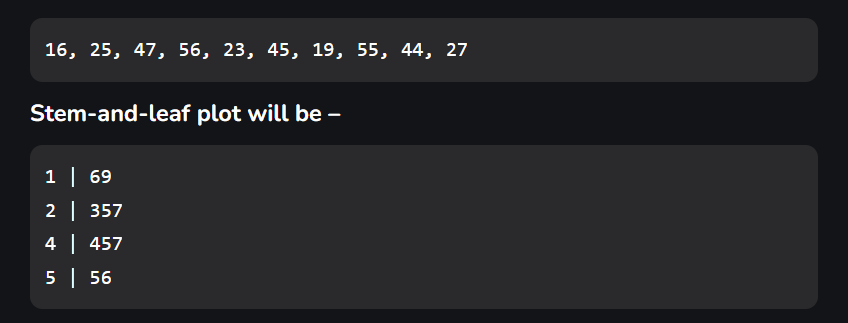


To view in matplotlib:<br>
```
stems = [1,1,2,2,2,4,4,4,5,5,6...] #all stems here
plt.xlabel('Data')
plt.ylabel('Stem')
plt.stem(stems,yarn['YARNSTRG'])
plt.show()
```



<ins>**(E) Robust Statistics for Location and Dispersion**</ins>

Now the mean and standard deviation are very sensitive to extreme outliers. If for some data you have 2350,2400 and by mistake the last one as 25000 your mean would be 9916.67 and similarly you would get an absurd standard deviation. For this reason we can use "**robust statistics**"

Instead of sample mean, we use a-trimmed mean, the proportion "a" of data is trimmed from lower and upper end, so we are left with 1-2a proportion. <br>
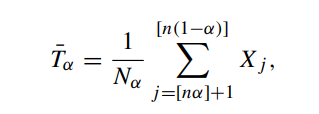 <br>
(eg: n=100, a = 0.05 -> mean of 90 ordered value is calculated).

The statistics Me,Ta,Q1 and Q3 don't really change with these outliers and thus robust; not sensitive against outliers.

For the standard deviation, we have the following robust statistics: <br>
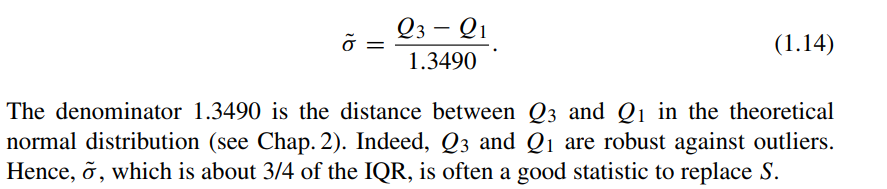 <br>

Another is a-trimmed sd:<br>
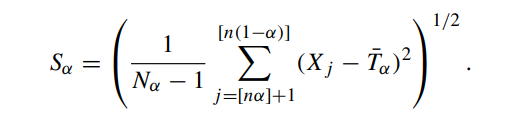



In [46]:
from scipy.stats import trim_mean
from scipy.stats import iqr

# Mean
x = pd.Series(yarn['YARNSTRG'])
ta = trim_mean(x,0.05)
print("Trimmed mean: {0}".format(ta))
print("Untrimmed mean: {0}".format(x.mean()))

# we can look at these values by just sorting it and seeing if there's a huge difference
x = x.sort_values()
print(x)

# For the standard deviation, the two methods are:
a = 0.05
x = np.array(x)
x.sort()
n = len(x)
low = int(n*a) + 1
high = int(n*(1-a))
print("S_a: {0}".format(x[low:(high+1)].std()))
print("s: {0}".format(iqr(x)/1.349))


Trimmed mean: 2.8982144444444446
Untrimmed mean: 2.9238429999999993
20    1.1514
63    1.1535
42    1.3436
24    1.4328
31    1.4570
       ...  
16    4.6315
94    4.6426
68    4.8444
8     5.0904
93    5.7978
Name: YARNSTRG, Length: 100, dtype: float64
S_a: 0.762291428239008
s: 0.9326167531504823
